#Probando modelos de reducción de dimensionalidad
La reducción de dimensionalidad en el aprendizaje automático es un proceso que implica la transformación de datos desde un espacio de alta dimensionalidad a un espacio de menor dimensionalidad. Los modelos de reducción de dimensionalidad son técnicas que se utilizan para lograr este objetivo

In [109]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr

grains=np.genfromtxt('/content/seeds-width-vs-length.csv', delimiter=',', dtype='float')
samples = np.genfromtxt('/content/samples.txt', delimiter=',')
samples = samples[:,1:]

#Análisis de Componentes Principales (PCA):
PCA es una técnica que busca las direcciones en las que los datos tienen la mayor varianza y proyecta los datos en esas direcciones.
Funciona encontrando un nuevo conjunto de variables (llamadas componentes principales) que son combinaciones lineales de las variables originales.
Se utiliza para reducir la dimensionalidad manteniendo la mayor cantidad de información posible en los primeros componentes principales.


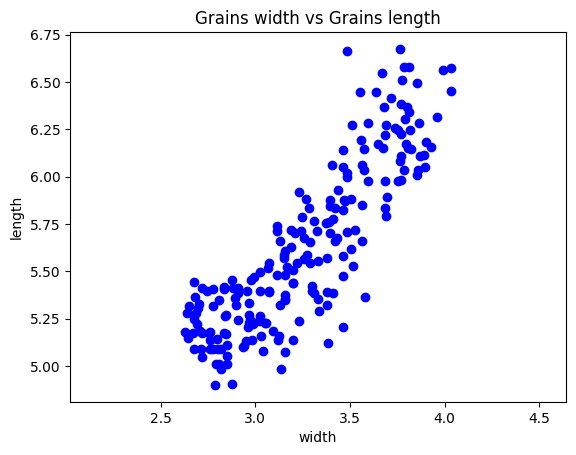

0.8604149377143469


In [110]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.title('Grains width vs Grains length')
plt.scatter(width, length, color='blue')
plt.xlabel('width')
plt.ylabel('length')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

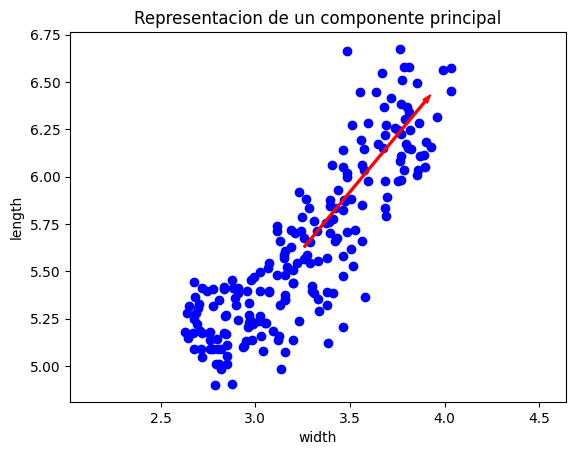

In [111]:
plt.scatter(grains[:,0], grains[:,1], color='blue')
plt.title('Representacion de un componente principal')
# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.xlabel('width')
plt.ylabel('length')

# Keep axes on same scale
plt.axis('equal')
plt.show()

#Visualizamos los datos
vemos como estos tienen una correlación, y lo que va a hacer el modelo PCA es hacer que la media de los datos sea 0 y su desviación estándar sea 1, vemos que la correlación antes era de un 86% antes de aplicar el modelo de PCA y ahora solo tiene 7% de correlación

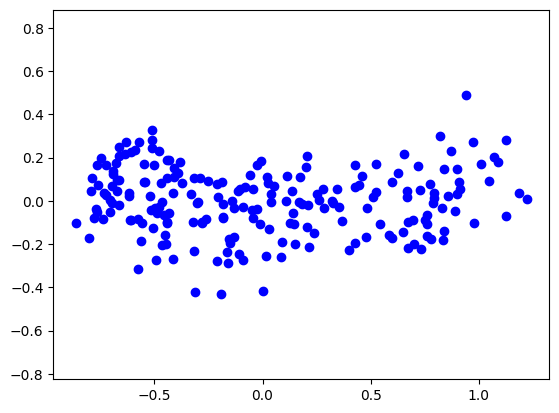

7.676151381197371e-17


In [112]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, color='blue')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

In [113]:
samples = np.genfromtxt('/content/samples.txt', delimiter=',')
samples = samples[:,1:]
samples.shape

(85, 6)

#Identificamos la relevancia de cada característica en el dataset
Lo que hacemos es pre-procesar los datos y luego aplicamos el modelo, esto lo hacemos de una sola vez con ayuda de un pipeline, e identificamos una por una la relevancia o varianza de cada característica para poder llegar a determinar la dimensión intrínseca.

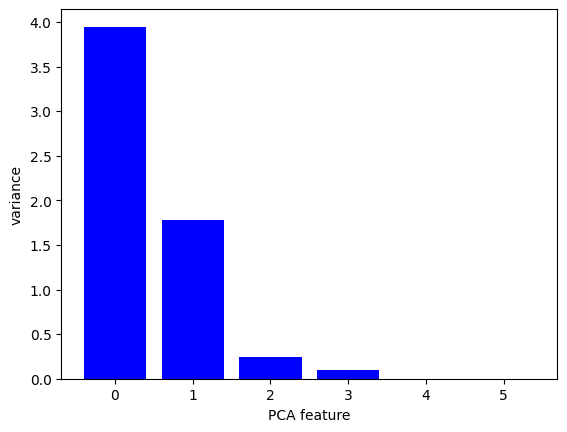

In [114]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_, color='blue')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#Finalmente, transformamos el dataset con el número de componentes que identificamos
Como podemos ver, seleccionamos el número de componentes que identificamos anteriormente y entrenamos el modelo con los datos ya estandarizados y vemos que nos queda el dataset con 85 filas y 2 columnas.

In [115]:
scaled_samples = scaler.transform(samples)

In [116]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


#Factorización de Matriz No Negativa (NMF):
NMF es una técnica de factorización matricial en la que las matrices generadas deben tener valores no negativos.
Es útil para la reducción de dimensionalidad en la minería de datos y la extracción de características.
Se utiliza en problemas donde existe interpretabilidad y se desea extraer características latentes significativas, al igual que PCA busca por decirlo así los componentes principales, ya que busca 'características' y  su 'frecuencia' para con base en los datos generar 2 matrices que al multiplicarlas me dará el dataset original

In [117]:
df = pd.read_csv('/content/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [118]:
# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

In [119]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003815
1    0.000000
2    0.000000
3    0.571864
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419562
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [120]:
with open('/content/wikipedia-vocabulary-utf8.txt', 'r') as file:
    words = [line.strip() for line in file.readlines()]

print(words)

['aaron', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abbas', 'abbey', 'abbreviated', 'abbreviation', 'abc', 'abdomen', 'abdominal', 'abdul', 'abel', 'abilities', 'ability', 'able', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolish', 'abolished', 'abolishing', 'abolition', 'aboriginal', 'abortion', 'abraham', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absorption', 'abstract', 'abstraction', 'absurd', 'abu', 'abundance', 'abundant', 'abuse', 'abused', 'abuses', 'abusive', 'academia', 'academic', 'academics', 'academies', 'academy', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessing', 'accession', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'acclaim', 'acclaimed', 'accolades', 'accommodate', 'acco

In [121]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.632107
award      0.254835
starred    0.246937
role       0.212875
actress    0.187653
Name: 3, dtype: float64


#Aplicando NMF a imágenes
Aplicamos NMF a un dataset que contiene una matriz de 100 filas y 104 columnas representando píxeles de 1 y 0 que representan imágenes, y para representarlas la redimensionamos y graficamos, y al final aplicamos el modelo.

In [122]:
samples = np.genfromtxt('/content/lcddigits.txt', delimiter=',')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


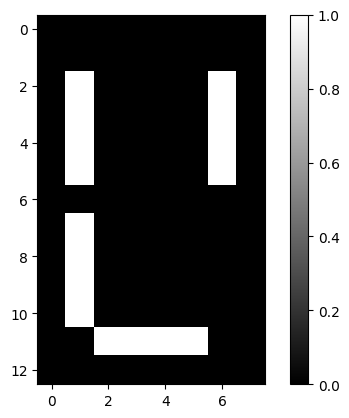

In [123]:
# Select the 0th row: digit
digit = samples[5,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


#vemos las imágenes o patrones de píxeles que más se presentan en el dataset
Gracias a esta ayuda de los gráficos podemos ver como el modelo logra reducir la dimensionalidad, conservando los patrones que más se repiten, demostrándonos el poder de este modelo y porque es tan útil en casos como este

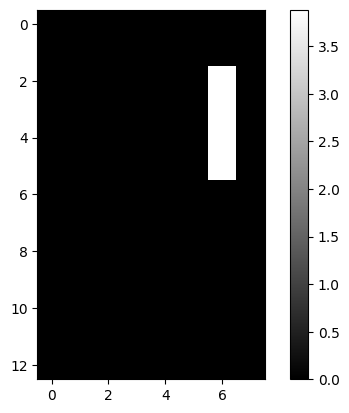

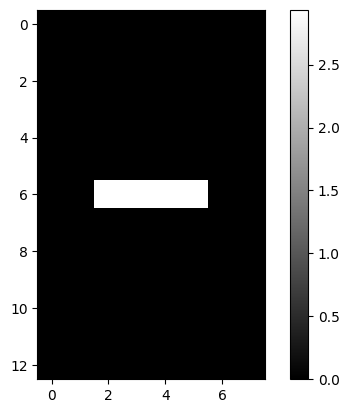

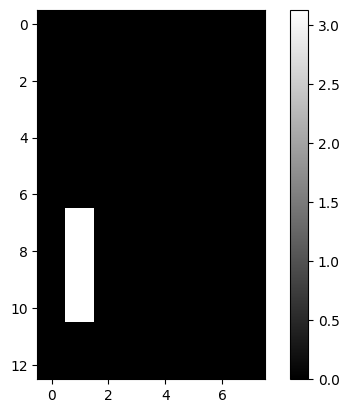

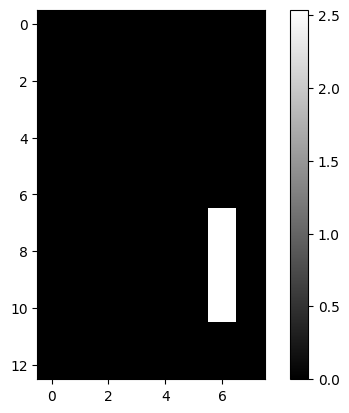

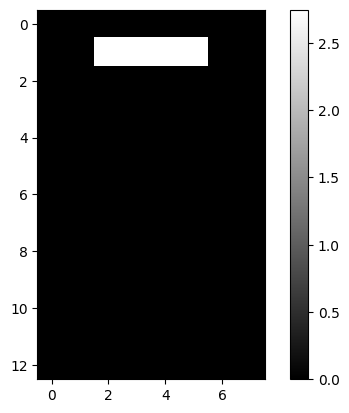

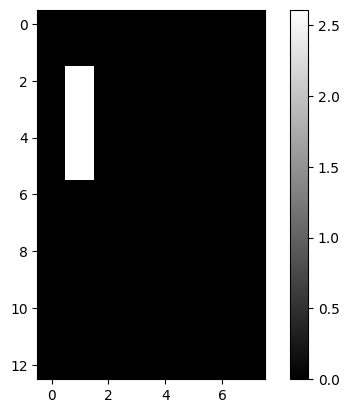

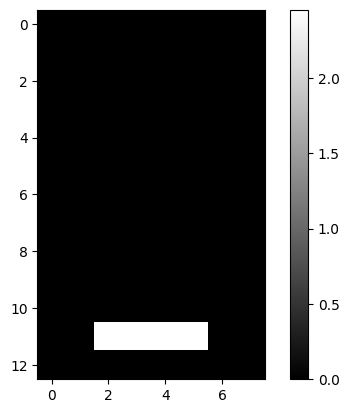

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281843e-14]


In [124]:

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

#Intentamos hacer el mismo proceso pero esta vez con PCA
como vemos no es tan eficiente en este caso como el modelo NMF que vimos anteriormente, sin embargo, sí logra reconocer algunos patrones, pero diría que no sería del todo recomendable para este tipo de problemas.

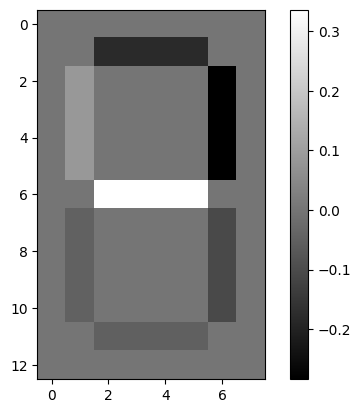

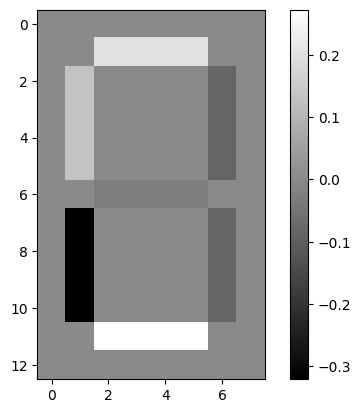

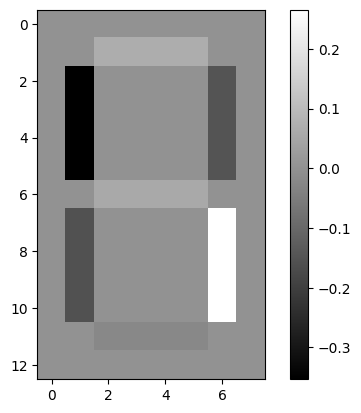

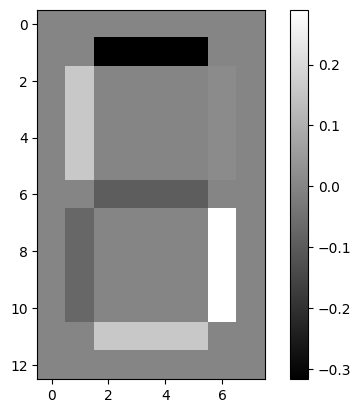

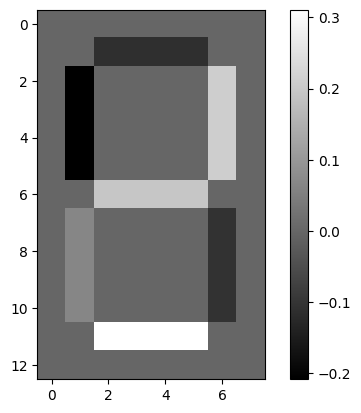

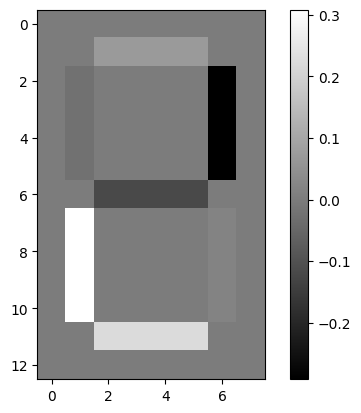

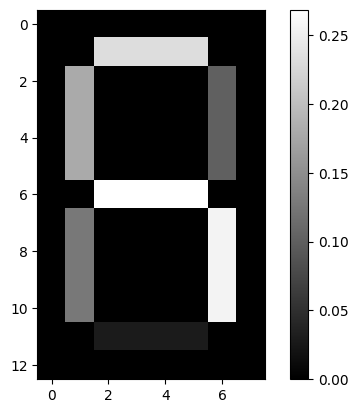

In [125]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)